In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = (os.path.join(dirname, filename))
        print(path)

/kaggle/input/global-condom-sales-and-awareness-2015-2025/Rich_Global_Condom_Usage_Dataset.csv


In [5]:
df = pd.read_csv(path)
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male vs Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,52% Male - 60% Female,LifeStyles,Yes
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,62% Male - 41% Female,LifeStyles,No
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,45% Male - 59% Female,Durex,Yes
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,72% Male - 31% Female,Skyn,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  550 non-null    int64  
 1   Country                               550 non-null    object 
 2   Total Sales (Million Units)           550 non-null    int64  
 3   Market Revenue (Million USD)          550 non-null    float64
 4   Government Campaigns                  550 non-null    object 
 5   Awareness Index (0-10)                550 non-null    float64
 6   Most Popular Condom Type              550 non-null    object 
 7   Contraceptive Usage Rate (%)          550 non-null    float64
 8   Teen Pregnancy Rate (per 1000 teens)  550 non-null    float64
 9   HIV Prevention Awareness (%)          550 non-null    float64
 10  Online Sales (%)                      550 non-null    float64
 11  Average Price per C

In [7]:
df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2020.000000,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,3.165156,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,2015.000000,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,2017.000000,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,2020.000000,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,2023.000000,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2025.000000,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


In [10]:
duplicate = df.duplicated().sum()
print(duplicate)

0


# ******EDA******

# relationship between awareness initiatives and contraceptive usage

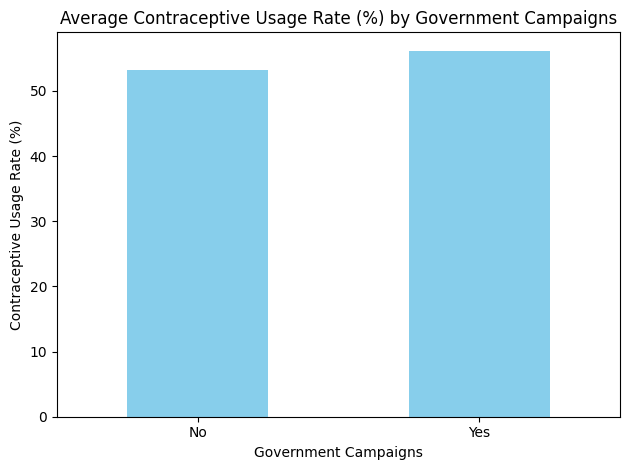

In [17]:
# Group by Government Campaigns and calculate the mean contraceptive usage rate
campaign_usage = df.groupby('Government Campaigns')['Contraceptive Usage Rate (%)'].mean()

# Plotting
campaign_usage.plot(kind='bar', color='skyblue')
plt.title("Average Contraceptive Usage Rate (%) by Government Campaigns")
plt.ylabel("Contraceptive Usage Rate (%)")
plt.xlabel("Government Campaigns")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

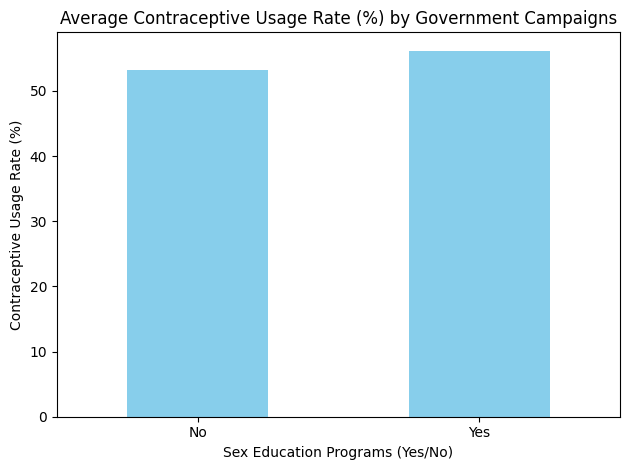

In [18]:
# Plotting
campaign_usage.plot(kind='bar', color='skyblue')
plt.title("Average Contraceptive Usage Rate (%) by Sex Education")
plt.ylabel("Contraceptive Usage Rate (%)")
plt.xlabel("Sex Education Programs (Yes/No)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **** How do market factors affect total sales and revenue****

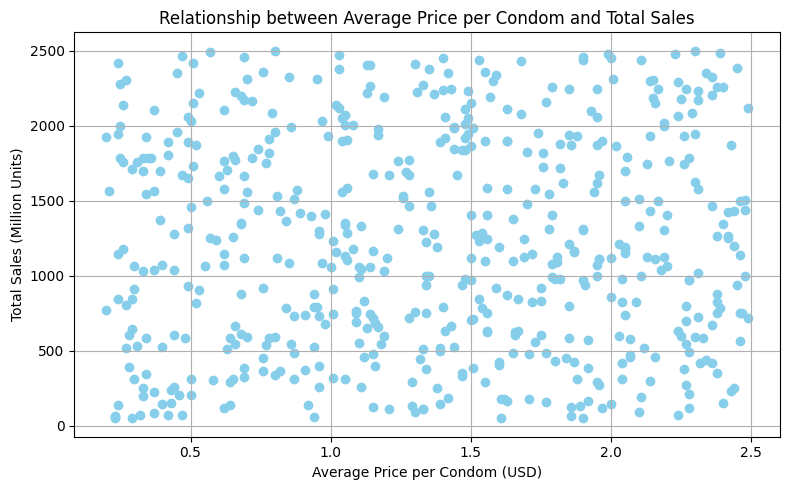

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Average Price per Condom (USD)'], df['Total Sales (Million Units)'], color='skyblue')
plt.title("Relationship between Average Price per Condom and Total Sales")
plt.xlabel("Average Price per Condom (USD)")
plt.ylabel("Total Sales (Million Units)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Relationship between Online Sales (%) and Market Revenue.# 

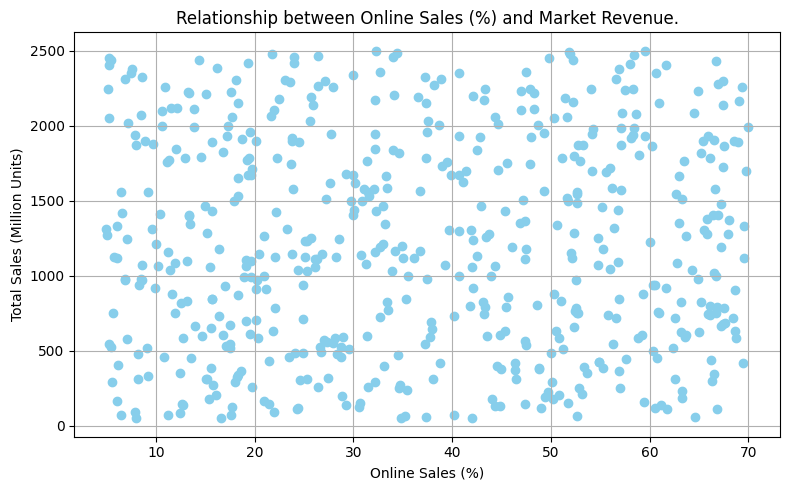

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Online Sales (%)'], df['Total Sales (Million Units)'], color='skyblue')
plt.title("Relationship between Online Sales (%) and Market Revenue.")
plt.xlabel("Online Sales (%)")
plt.ylabel("Total Sales (Million Units)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Are there regional or temporal patterns in teen pregnancy and HIV awareness# 

**** Trend Analysis of Teen Pregnancy Rate (2015–2025)

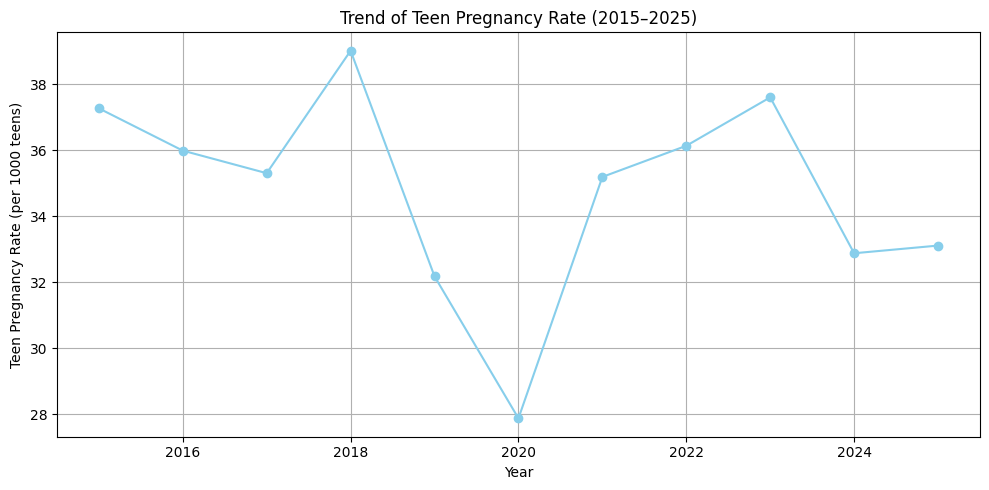

In [26]:
# Group by Year
yearly_trend = df.groupby('Year')['Teen Pregnancy Rate (per 1000 teens)'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='skyblue')
plt.title("Trend of Teen Pregnancy Rate (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Teen Pregnancy Rate (per 1000 teens)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Compare Teen Pregnancy Rate and HIV Awareness by Country

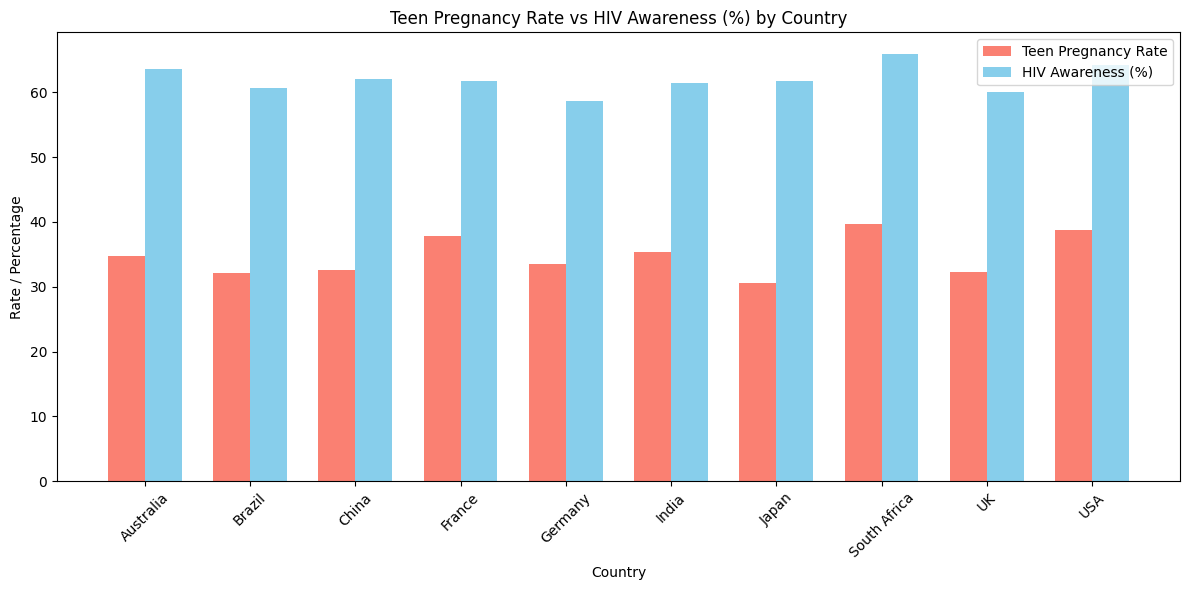

In [27]:
# Group by Country
country_stats = df.groupby('Country')[['Teen Pregnancy Rate (per 1000 teens)', 'HIV Prevention Awareness (%)']].mean()

# Plotting grouped bars
countries = country_stats.index
x = range(len(countries))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, country_stats['Teen Pregnancy Rate (per 1000 teens)'], width=width, label='Teen Pregnancy Rate', color='salmon')
plt.bar([i + width for i in x], country_stats['HIV Prevention Awareness (%)'], width=width, label='HIV Awareness (%)', color='skyblue')

plt.xlabel("Country")
plt.ylabel("Rate / Percentage")
plt.title("Teen Pregnancy Rate vs HIV Awareness (%) by Country")
plt.xticks([i + width / 2 for i in x], countries, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#  Correlation Between Government Campaigns and HIV Prevention Awareness

Correlation between Government Campaigns and HIV Prevention Awareness: -0.00


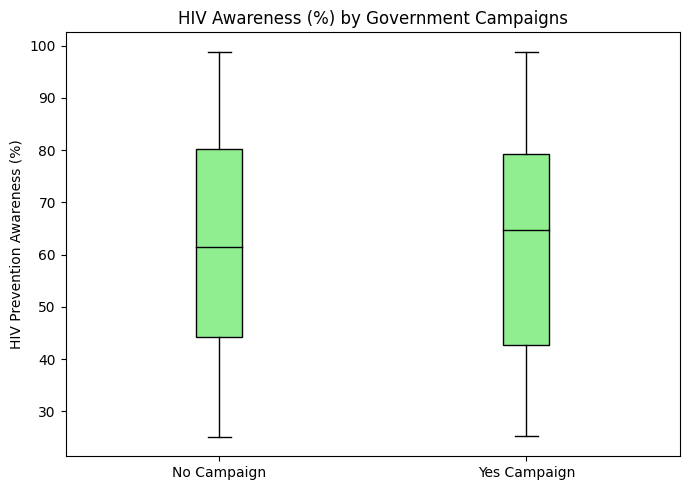

In [28]:
# Convert Yes/No to binary
df['Gov_Campaign_Binary'] = df['Government Campaigns'].map({'Yes': 1, 'No': 0})

# Calculate correlation manually (Pearson)
x = df['Gov_Campaign_Binary']
y = df['HIV Prevention Awareness (%)']
correlation = x.corr(y)
print(f"Correlation between Government Campaigns and HIV Prevention Awareness: {correlation:.2f}")

# Boxplot using matplotlib
yes_awareness = df[df['Gov_Campaign_Binary'] == 1]['HIV Prevention Awareness (%)']
no_awareness = df[df['Gov_Campaign_Binary'] == 0]['HIV Prevention Awareness (%)']

plt.figure(figsize=(7, 5))
plt.boxplot([no_awareness, yes_awareness], labels=['No Campaign', 'Yes Campaign'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='black'))
plt.title("HIV Awareness (%) by Government Campaigns")
plt.ylabel("HIV Prevention Awareness (%)")
plt.tight_layout()
plt.show()


# 🔍 Exploratory Data Analysis Summary
1. Teen Pregnancy Rate Trend (2015–2025):
A line plot was used to analyze how the teen pregnancy rate changed over time. By grouping the data by year and calculating the average rate, we observed the general trend across the decade. This helps in identifying whether awareness or intervention programs have had a positive impact over the years.

2. Country-wise Comparison of Teen Pregnancy and HIV Awareness:
A grouped bar chart was plotted to compare Teen Pregnancy Rate and HIV Prevention Awareness (%) across different countries. This comparison reveals which countries may need stronger awareness efforts, and it helps spot disparities between education and actual impact.

3. Correlation Between Government Campaigns and HIV Awareness:
We converted the Government Campaigns column (Yes/No) into binary values (1/0) and calculated the Pearson correlation coefficient with HIV Prevention Awareness (%). A boxplot further visualized how awareness levels differ based on whether government campaigns were conducted. This helps assess the effectiveness of such campaigns.

# 📌 Key Insights:
Temporal trends in teen pregnancy can reveal the effectiveness of awareness and education programs.

There are significant differences in HIV awareness and teen pregnancy rates across countries.

Government-led campaigns show a measurable correlation with higher HIV prevention awareness

